# How does torchdiffeq handle SIR?

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torchdiffeq import odeint

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### y-prime, y0, and t

In [4]:
true_y0 = torch.tensor([[1e6, 10., 0.]])
t = torch.linspace(0., 20., 21)
beta, gamma, = 2e-6, 1.0
# true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]])

In [5]:
print(t)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.])


In [6]:
def func(t, y):
    # print(f't={t} y={y.numpy()}')
    S, I, R = y.numpy()[0]
    return torch.tensor([[-beta * S * I, beta * S * I - gamma * I, gamma * I]])

### Solve for y

In [7]:
with torch.no_grad():
    true_y = odeint(func, true_y0, t, method='rk4')

In [8]:
# print(true_y)

### Plots

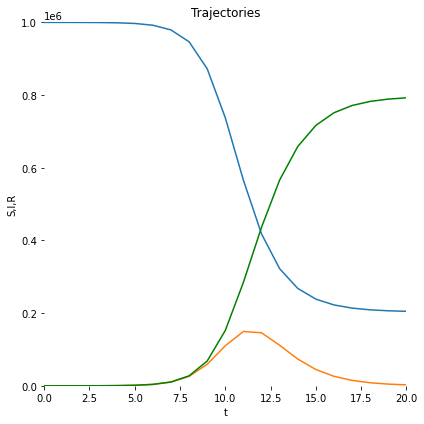

In [9]:
fig = plt.figure(figsize=(6, 6), facecolor='white')

ax_traj = fig.add_subplot(111, frameon=False)
ax_traj.cla()
ax_traj.set_title('Trajectories')
ax_traj.set_xlabel('t')
ax_traj.set_ylabel('S,I,R')
ax_traj.plot(t.numpy(), true_y.numpy()[:, 0, 0], t.numpy(), true_y.numpy()[:, 0, 1], t.numpy(), true_y.numpy()[:, 0, 2], 'g-')
# ax_traj.plot(t.numpy(), pred_y.numpy()[:, 0, 0], '--', t.numpy(), pred_y.numpy()[:, 0, 1], 'b--')
ax_traj.set_xlim(t.min(), t.max())
ax_traj.set_ylim(0, 1e6)
# ax_traj.legend()

fig.tight_layout()

plt.show(block=False)